# Привет!

Добро пожаловать на курс "Практикум по математической статистике".

Ниже мы вспомним некоторые приемы визуализации данных, и обсудим, какой график красивый, а какой нет.

In [ ]:
import numpy as np
from scipy import stats as sps
from matplotlib import pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format="retina"  # only for retina display

Старайтесь, чтобы ваш код был **воспроизводимым**. Для этого, как правило, достаточно добавить эту строку, и перед отправкой нажать `restart and run all`.

In [ ]:
np.random.seed(42)

Всегда старайтесь фиксировать магические константы и заводить переменные написаные КАПСОМ.

In [ ]:
SAMPLE_SIZE=400
SAMPLE_NUM=100

Для начала, давайте сгенерируем несколько выборок из стандартного распределения и несколько из $\mathit{N}(0.2, 1)$ и посмотрим как ведет себя их среднее. Будем использовать только **векторную** арифметику.

In [ ]:
samples = sps.norm().rvs((SAMPLE_NUM, SAMPLE_SIZE))
mask = sps.bernoulli(0.5).rvs(SAMPLE_NUM).astype(bool)
samples[mask] += 0.2
means = np.cumsum(samples, axis=1) / (np.arange(SAMPLE_SIZE)+1)

Давайте попробуем построить график этой величины для всех выборок.

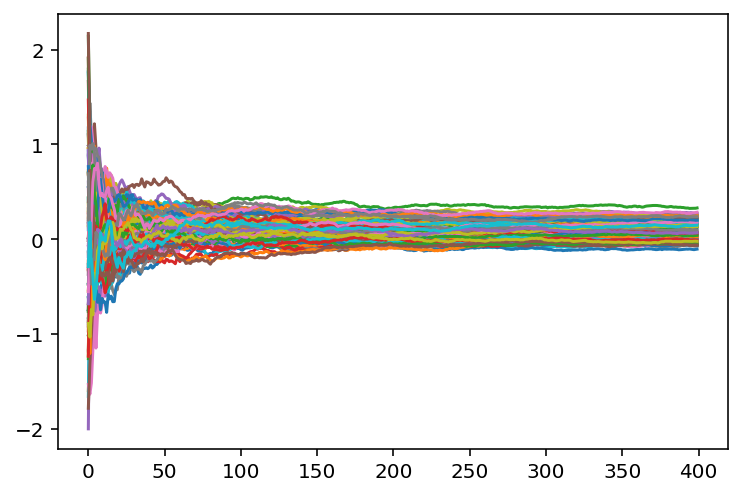

In [ ]:
for mean in means:
    plt.plot(range(SAMPLE_SIZE), mean)

Я думаю всем ясно, что такой график хорошим не назовешь. Попробуем еще раз!

Text(0, 0.5, '$\\overline{X}$')

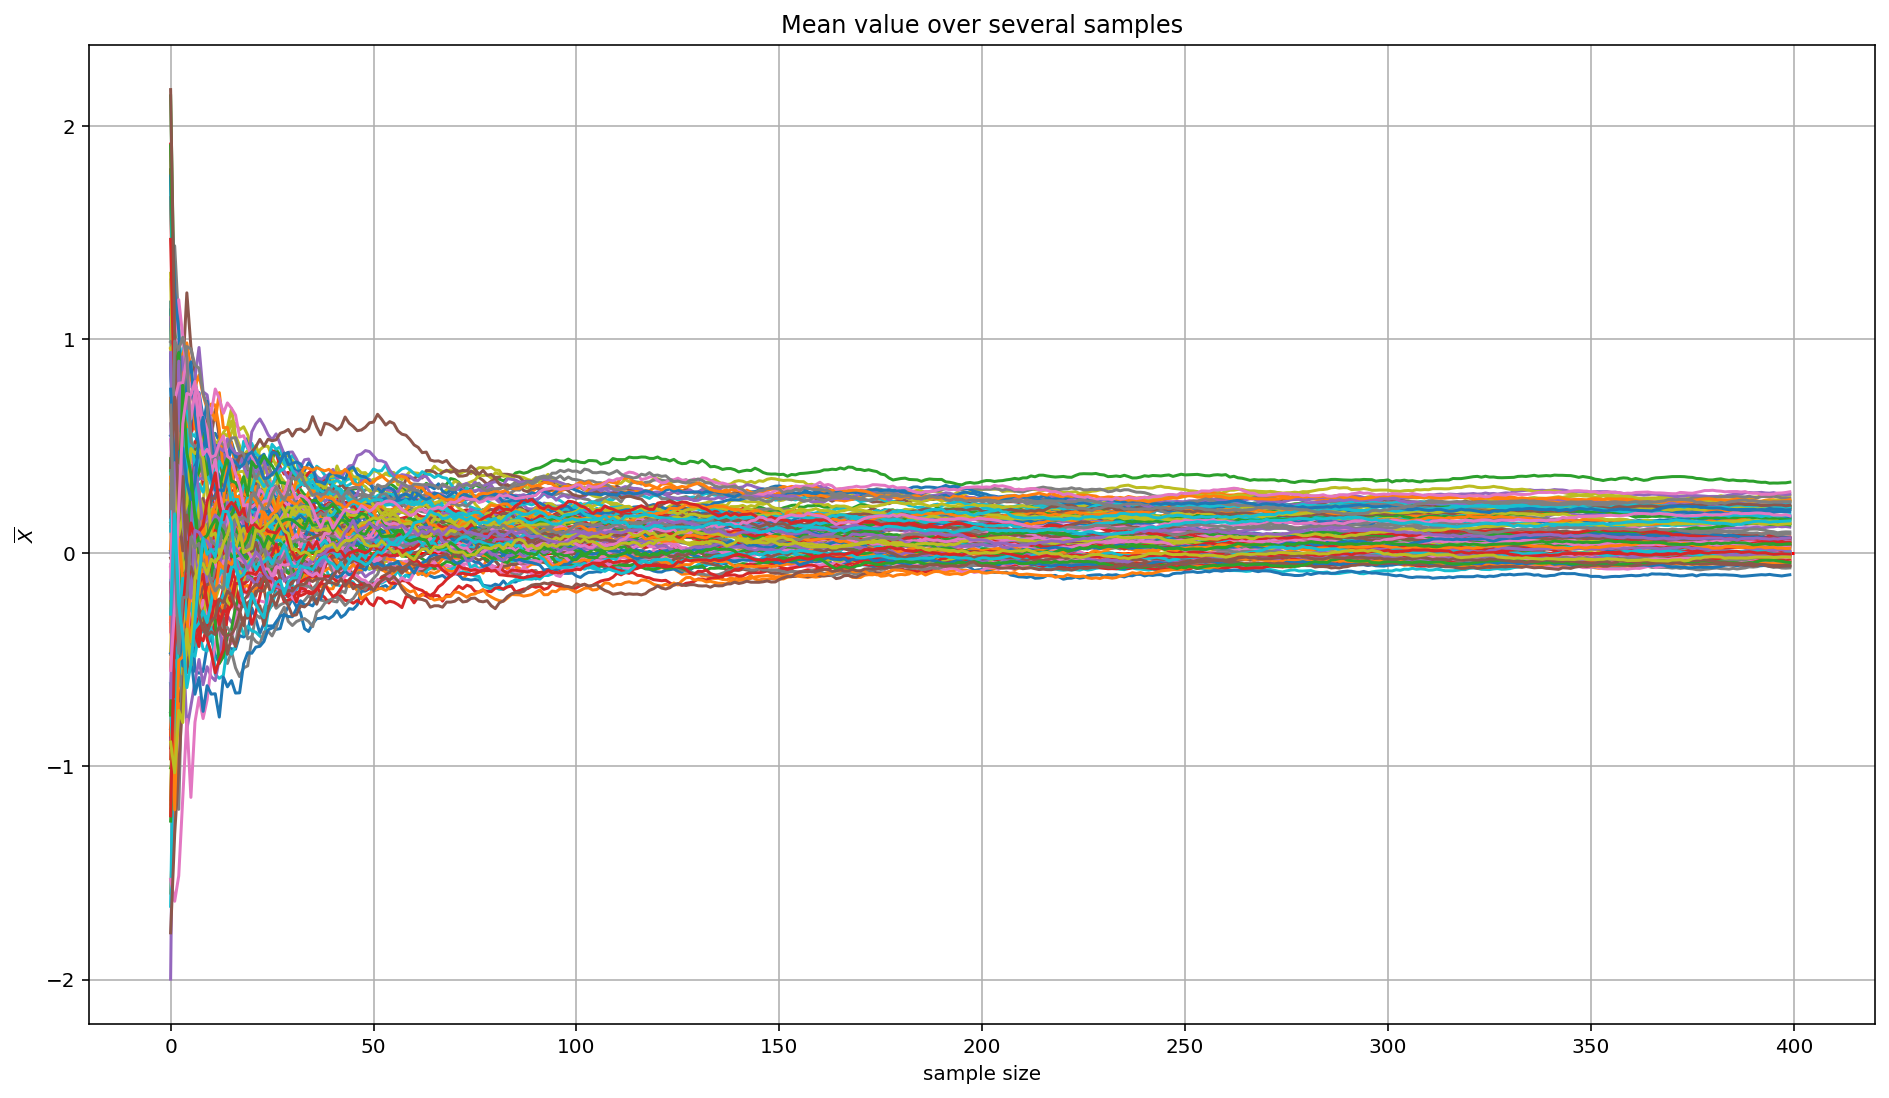

In [ ]:
plt.figure(figsize=(16,9))
plt.title("Mean value over several samples")
for mean in means:
    plt.plot(range(SAMPLE_SIZE), mean)
plt.hlines(y=0, xmin=0, xmax=SAMPLE_SIZE, color="r")
plt.grid()
plt.xlabel("sample size")
plt.ylabel(r"$\overline{X}$")

Стало лучше, но разница между двумя группами линий не различима, также у нас сверху появилась уродливая надпись `Text(0, 0.5, '$\\overline{X}$')`.
Чтобы ее убрать достаточно в конец добавить `plt.plot()`.
Давайте сделаем линии полупрозрачными `alpha=0.57` и добавим серый фон `sns.set_style("darkgrid")`. Не стесняйтесь использовать шрифты большего размера, предавая аргумент `fontsize`. Или можете передать аргумент `font_scale` в `sns.set`.

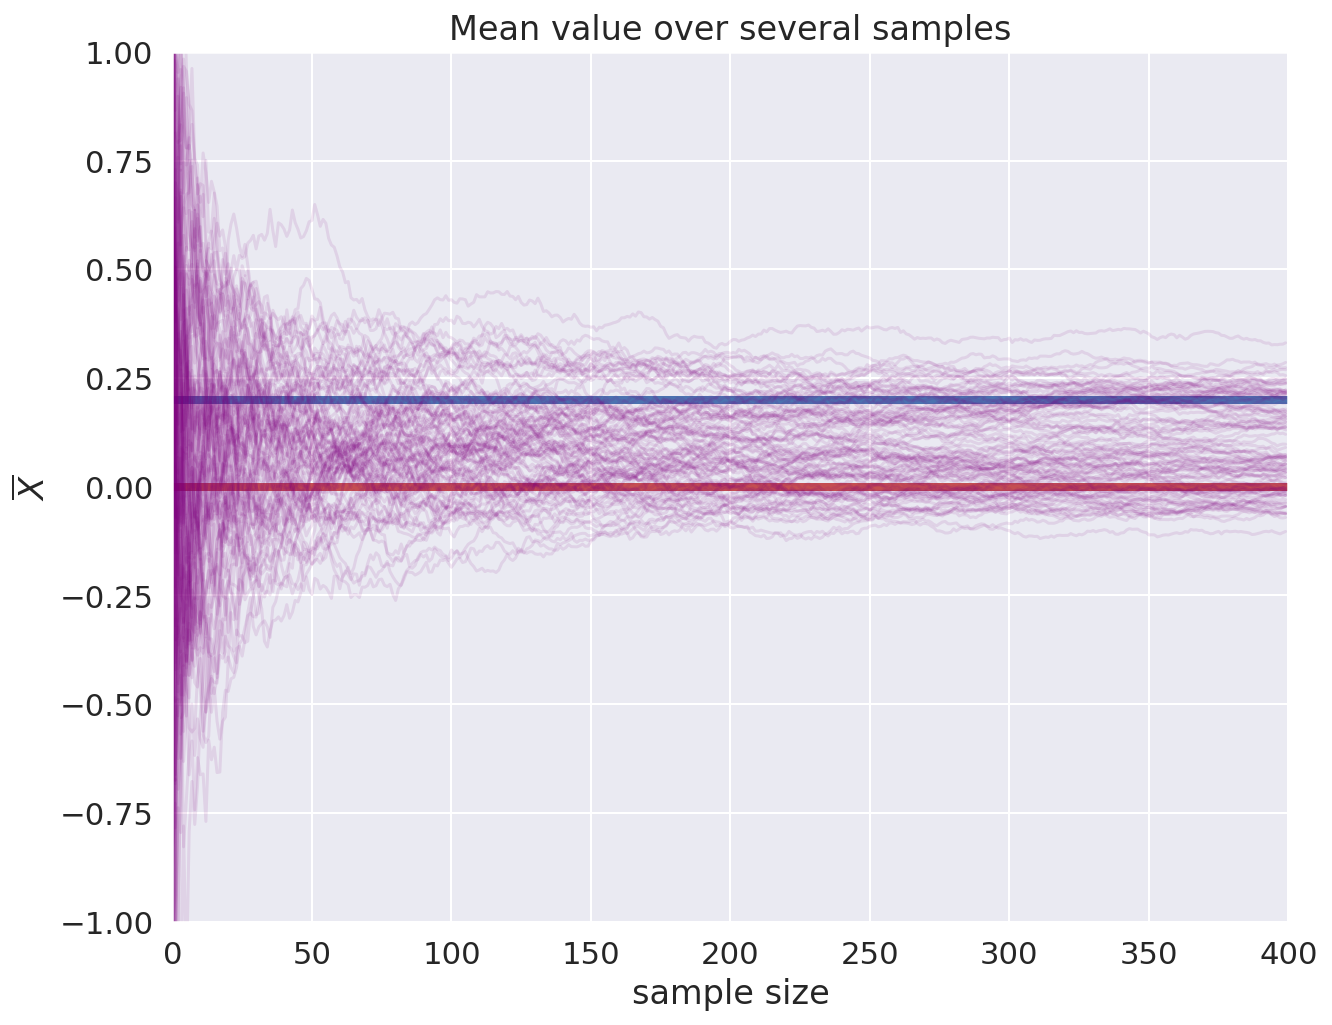

In [ ]:
sns.set(style="darkgrid", font_scale=1.4)

plt.figure(figsize=(10,8))
plt.title("Mean value over several samples")
for mean in means:
    plt.plot(range(SAMPLE_SIZE), mean, alpha=0.1, color="purple")
plt.hlines(y=0, xmin=0, xmax=SAMPLE_SIZE, color="r", linewidth=4)
plt.hlines(y=0.2, xmin=0, xmax=SAMPLE_SIZE, color="b", linewidth=4)
plt.xlim(0, SAMPLE_SIZE)
plt.ylim(-1, 1)
plt.xlabel("sample size")
plt.ylabel(r"$\overline{X}$")
plt.show()

### Белые против серых

Для графиков с линиями без закрашенных площадей принято использовать серый фон. Если же график содержит закрашенную площадь, то принято использовать белый фон для лучшего контраста.

Например далее мы можем видеть пример графика с белым фоном, так как *доверительый интервал* закрашен в красный цвет.

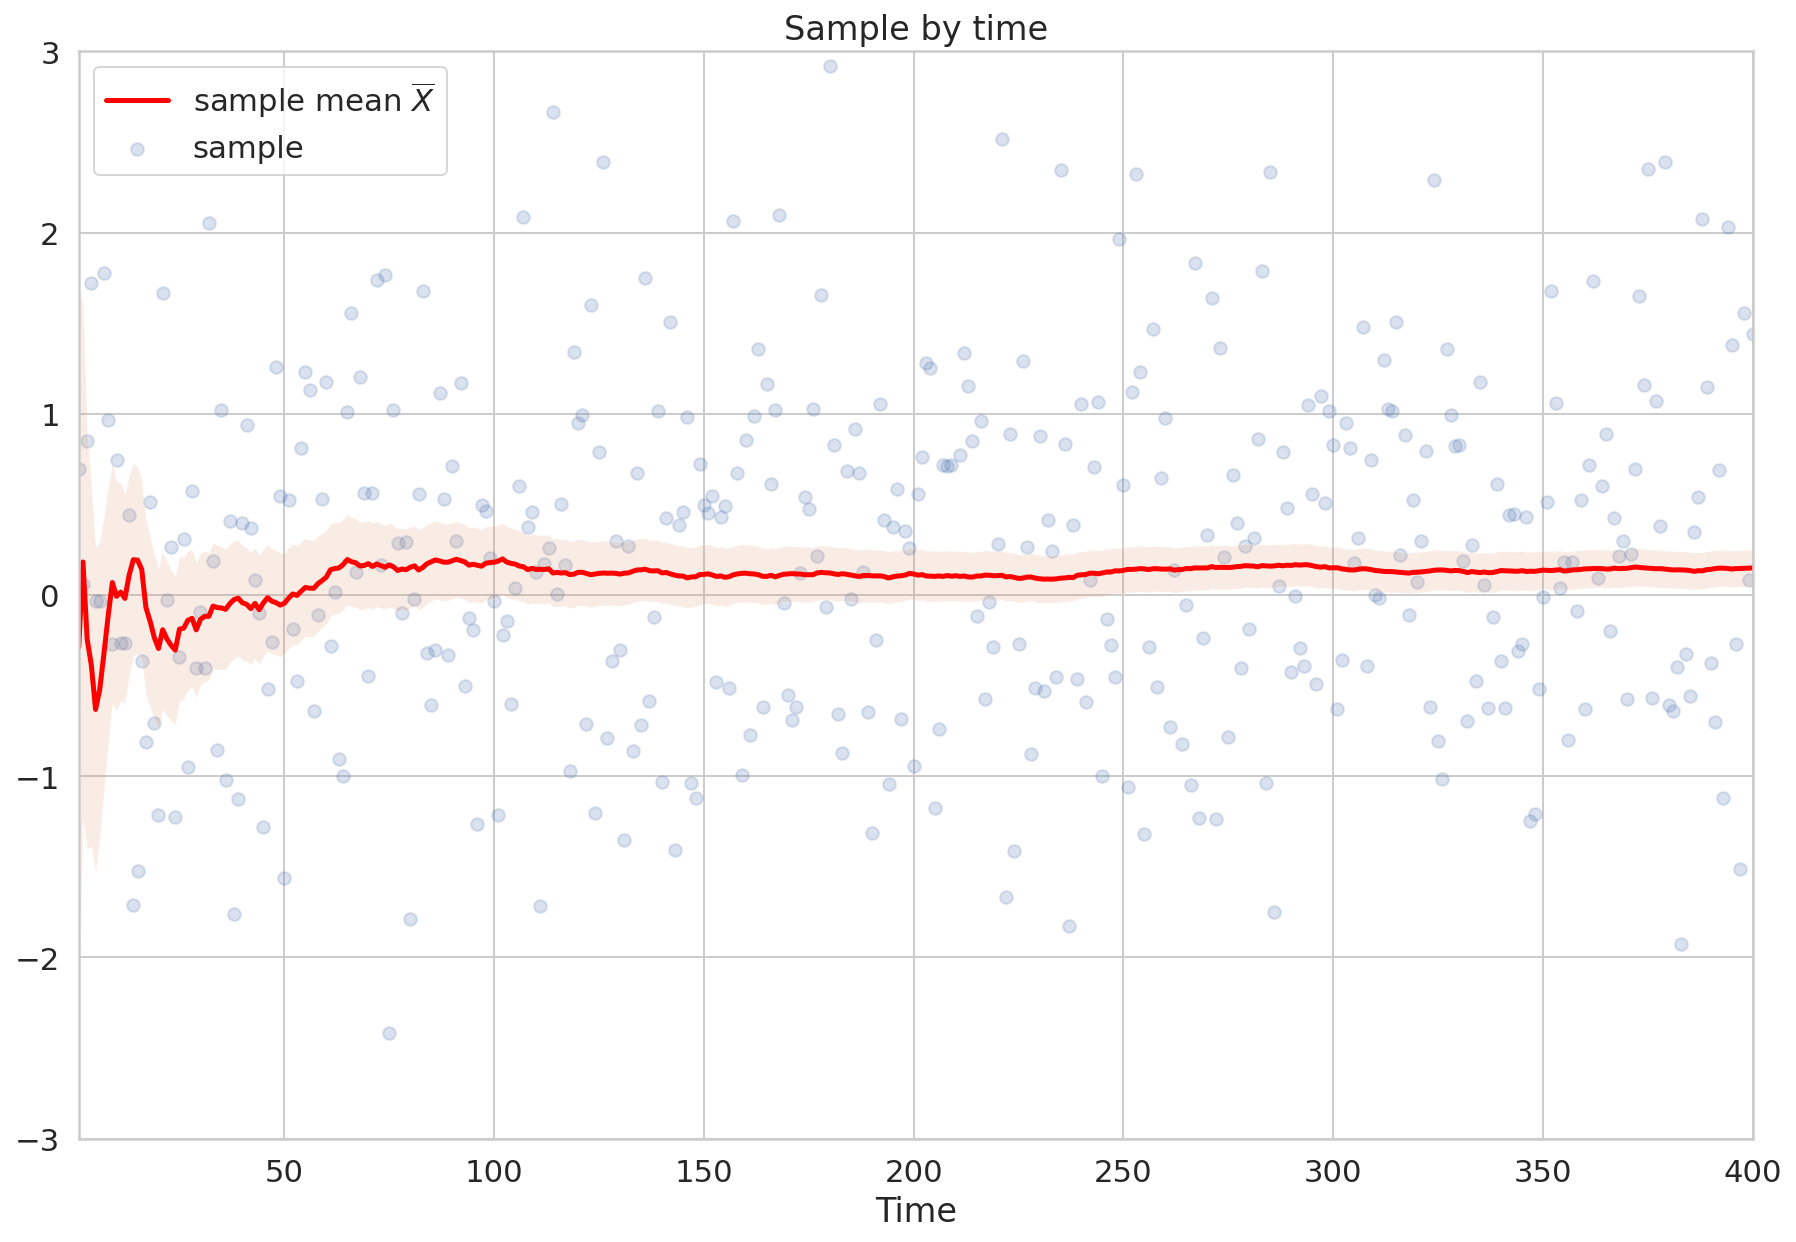

In [ ]:
sns.set_style("whitegrid")

sample = samples[0]
time = np.arange(SAMPLE_SIZE) + 1
plt.figure(figsize=(15, 10))
plt.scatter(time, sample, alpha=0.2, s=40, label='sample')
plt.plot(
    time, 
    mean, #Это что последний mean из цикла?.. 
    color='red', 
    linewidth=2.5, 
    label='sample mean $\overline{X}$'
) 
plt.fill_between(
    x=time, 
    y1=mean + 2 / np.sqrt(time),
    y2=mean - 2 / np.sqrt(time),
    alpha=0.15
)
plt.legend()
plt.xlim((1, SAMPLE_SIZE))
plt.ylim((-3, 3))
plt.xlabel('Time')
plt.title('Sample by time')
plt.savefig('example.png')
plt.show()

# Анализ распределения от различных факторов

Давайте посмотрим на, пожалуй, самый популярный датасет для анализа данных. Посмотрим на длину лепестка в зависимости от вида.

In [ ]:
df = sns.load_dataset("iris")

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
c_map = dict(zip(df["species"].unique(), np.arange(3)))
df["color"] = df["species"].apply(
    lambda x: c_map[x]
)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,color
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


## Scatterplot

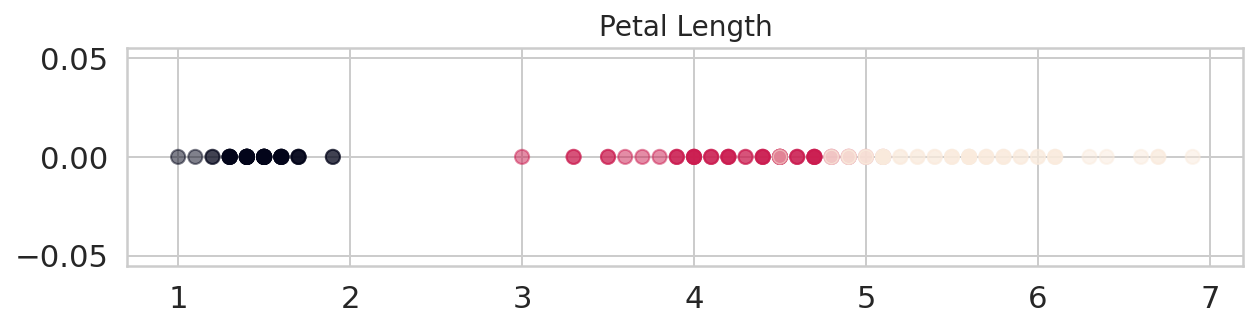

In [ ]:

plt.figure(figsize=(10, 2))
plt.title("Petal Length", fontsize=14)
plt.scatter(
    df["petal_length"], [0]*df.shape[0], s=50, c=df["color"], alpha=0.5
)
plt.show()

Кажется делать scatterplot на одном графике плохая идея в этом случае

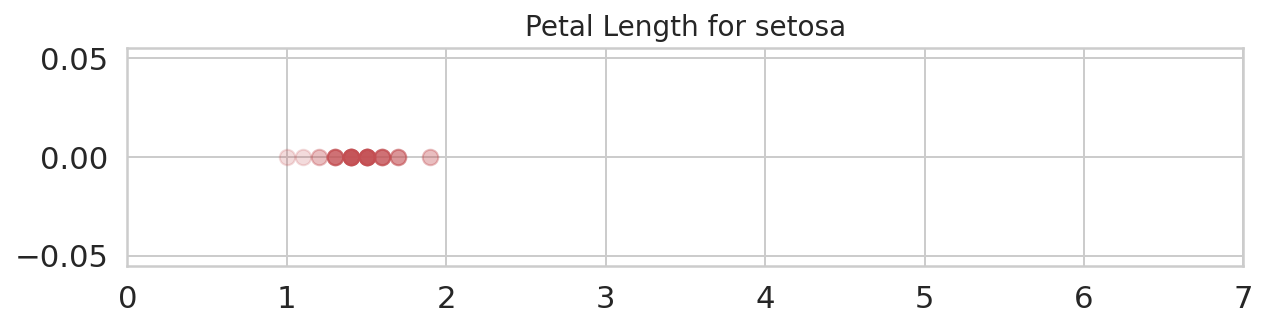

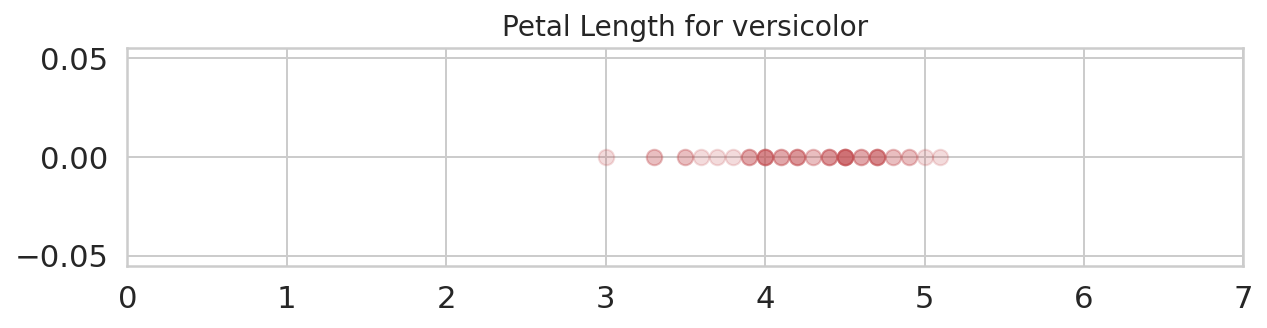

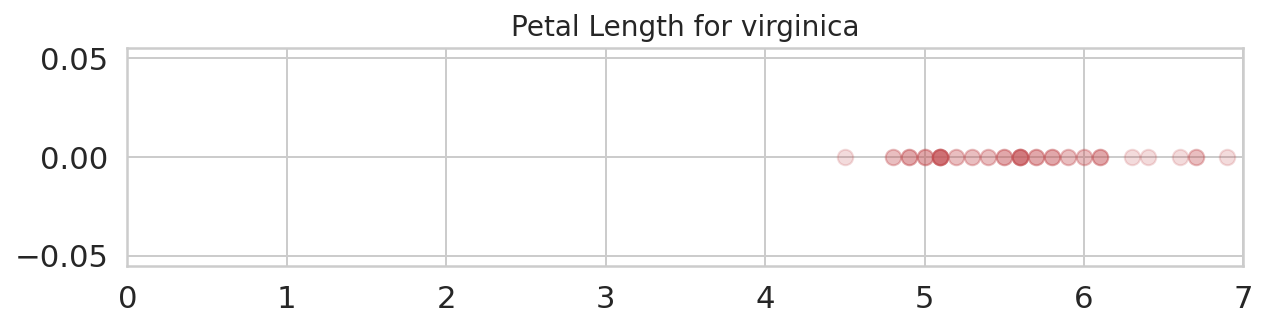

In [ ]:
for sp in c_map.keys():
    current_df = df[df["species"] == sp]
    plt.figure(figsize=(10, 2))
    plt.title(f"Petal Length for {sp}", fontsize=14)
    plt.scatter(
        x=current_df["petal_length"], 
        y=[0]*current_df.shape[0], 
        s=60, 
        c="r",
        alpha=0.2
    )
    plt.xlim(0, 7)
    plt.show()

Так намного лучше, но давайте вспомним и другие способы визуализации распределения по классам.

## Boxplot

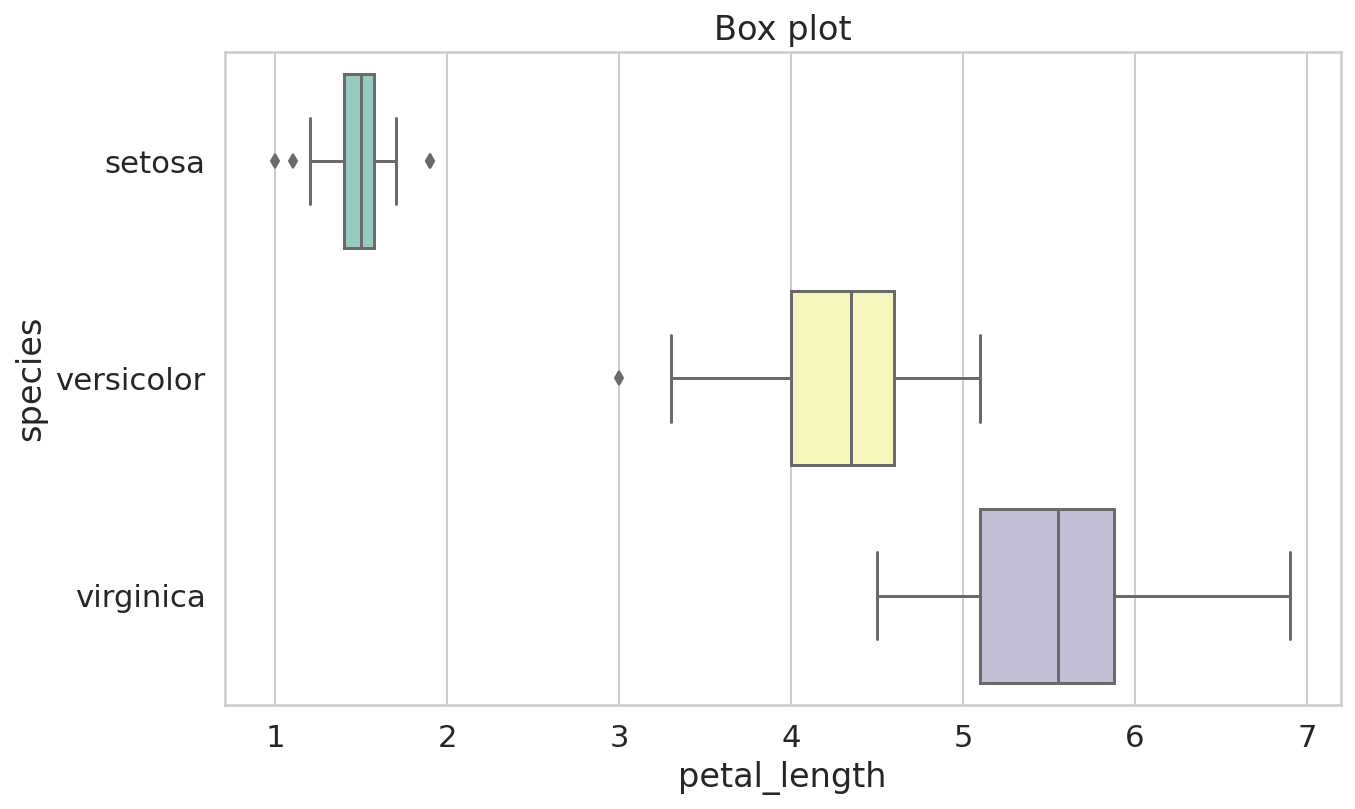

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Box plot")
sns.boxplot(x=df["petal_length"], y=df["species"], palette='Set3')
plt.show()

## Violin plot

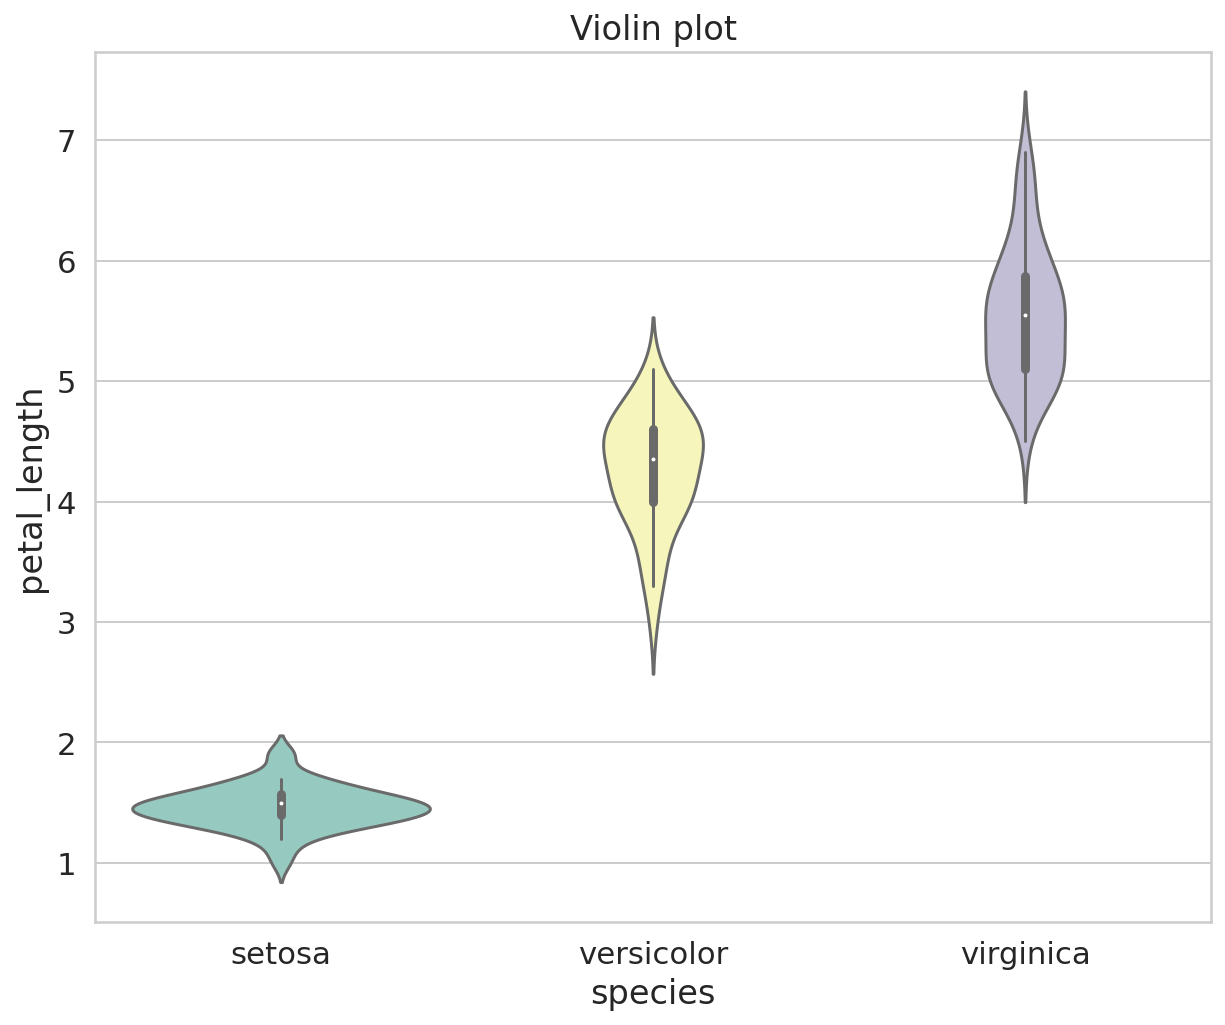

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
plt.title("Violin plot")
sns.violinplot(x=df["species"], y=df["petal_length"], palette='Set3')
plt.show()

# Визуализация плотности

### Scatter plot

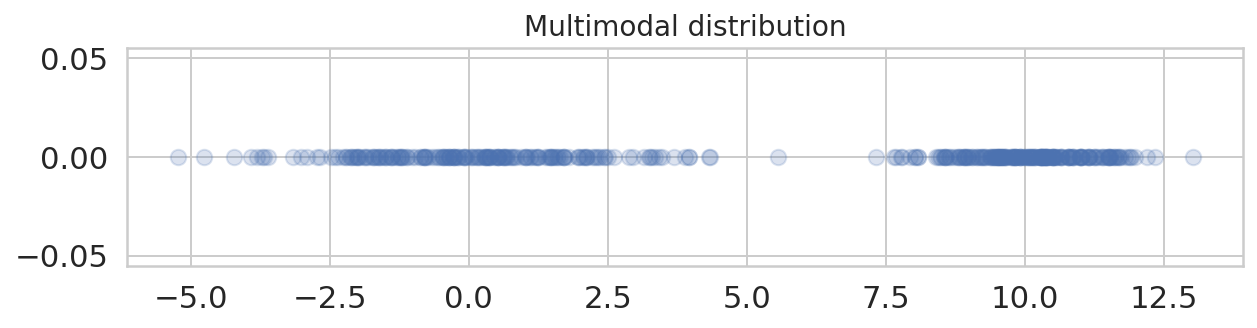

In [ ]:
mask = sps.bernoulli(0.5).rvs(SAMPLE_SIZE).astype(bool)
sample_1 = sps.norm(0, 2).rvs(SAMPLE_SIZE)
sample_1[mask] = 0
sample_2 = sps.norm(10, 1).rvs(SAMPLE_SIZE)
sample_2[~mask] = 0
sample = sample_1 + sample_2
plt.figure(figsize=(10, 2))
plt.title("Multimodal distribution", fontsize=14)
plt.scatter(
    sample, [0]*len(sample), s=60, alpha=0.2
)
plt.show()

### Histogram

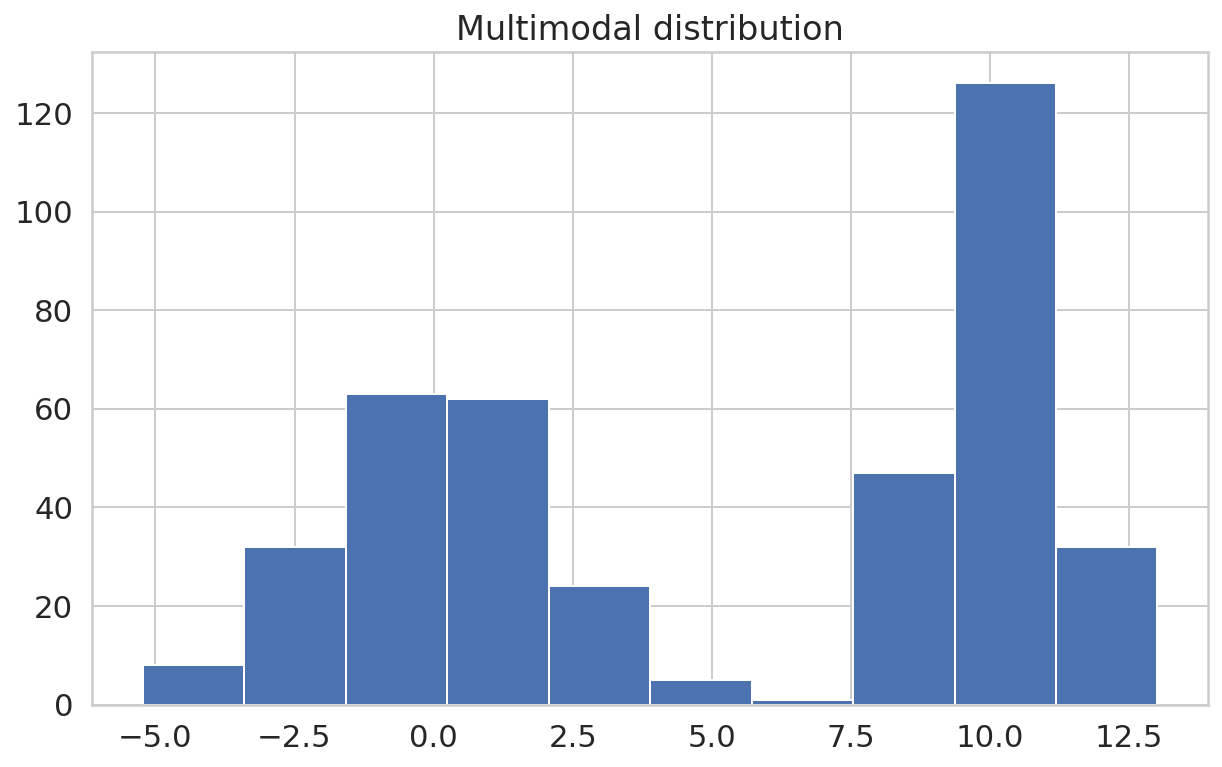

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Multimodal distribution")
plt.hist(
    sample
)
plt.show()

### KDE

Небольшое замечание по поводе KDE. **Не используйте KDE для данных из дискретного распределения**. Вы получите что-то необъяснимое с точки зрения статистики.

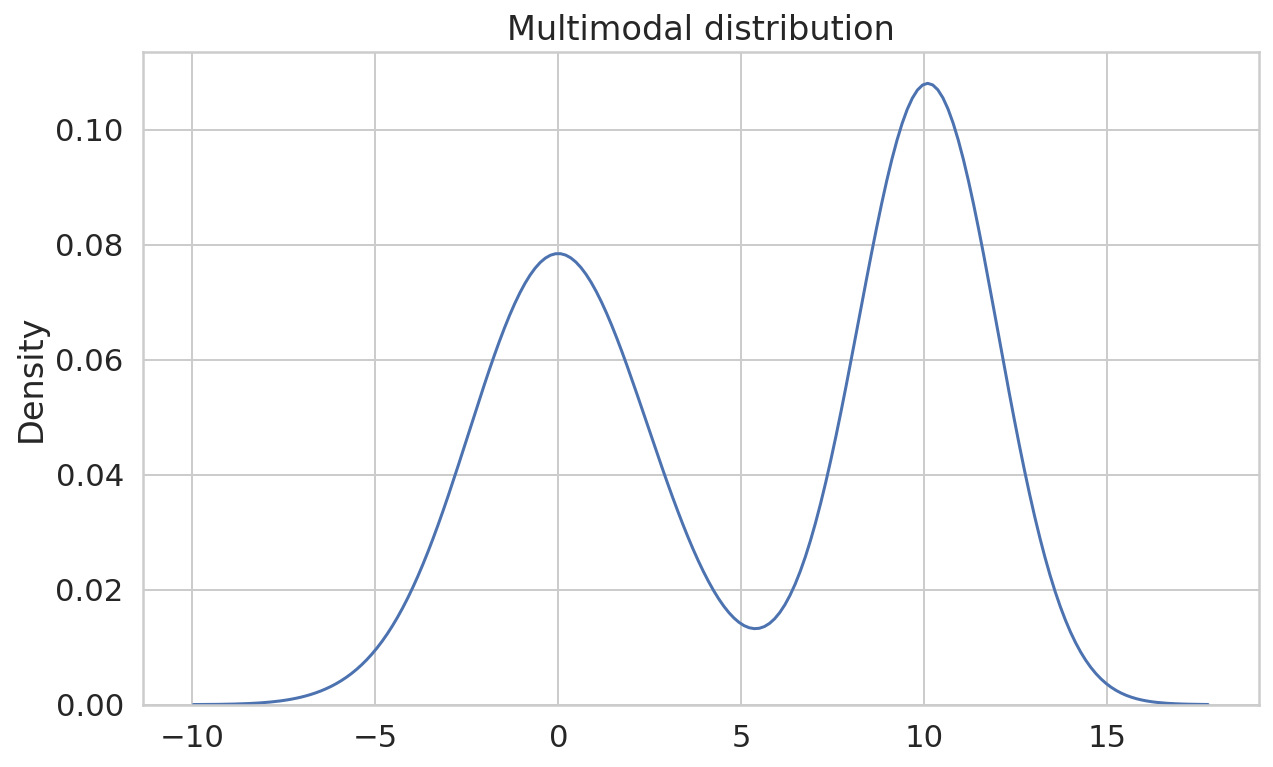

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Multimodal distribution")
sns.kdeplot(sample)
plt.show()

### Distplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


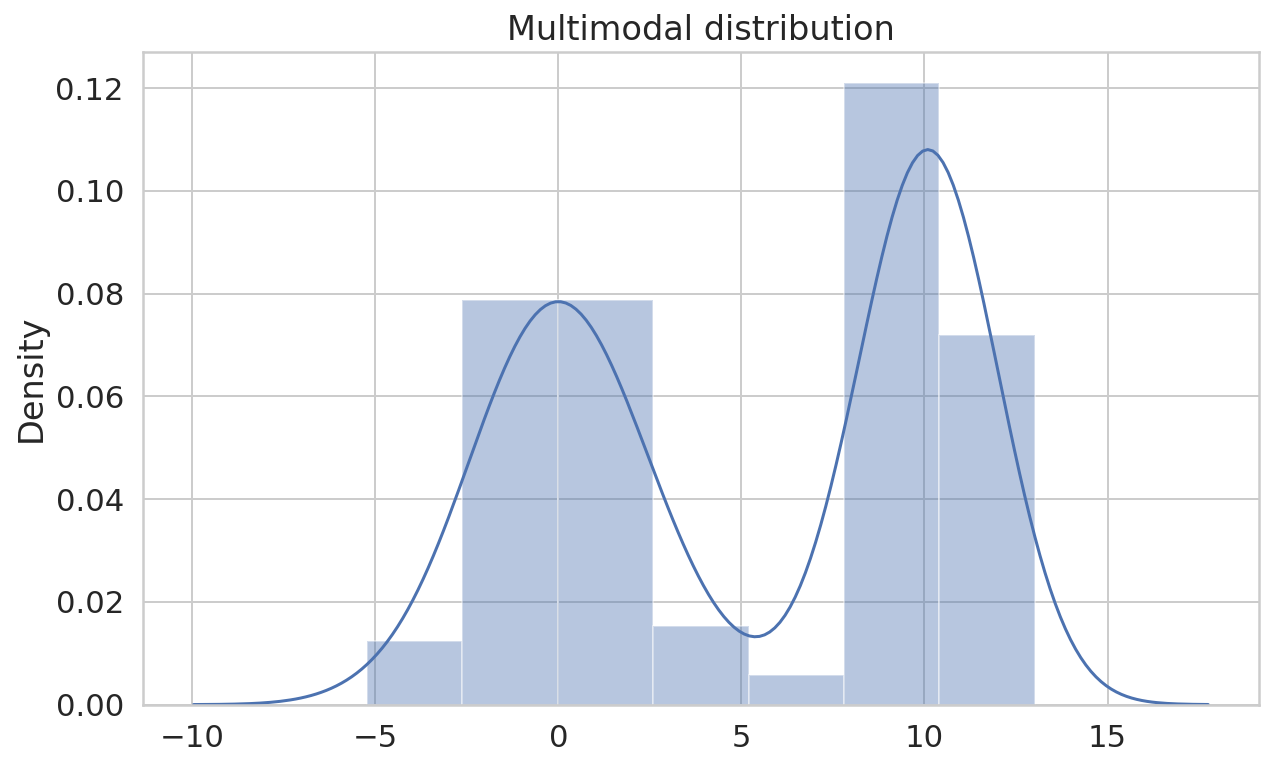

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Multimodal distribution")
sns.distplot(sample)
plt.show()

## Двумерный случай

Для двумерного случая KDE plot будет иметь размерность 3. Однако мы можем воспользоваться линиями уровня и разными уровнями насыщенности.

In [ ]:
geyser = sns.load_dataset("geyser")
geyser.head()

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


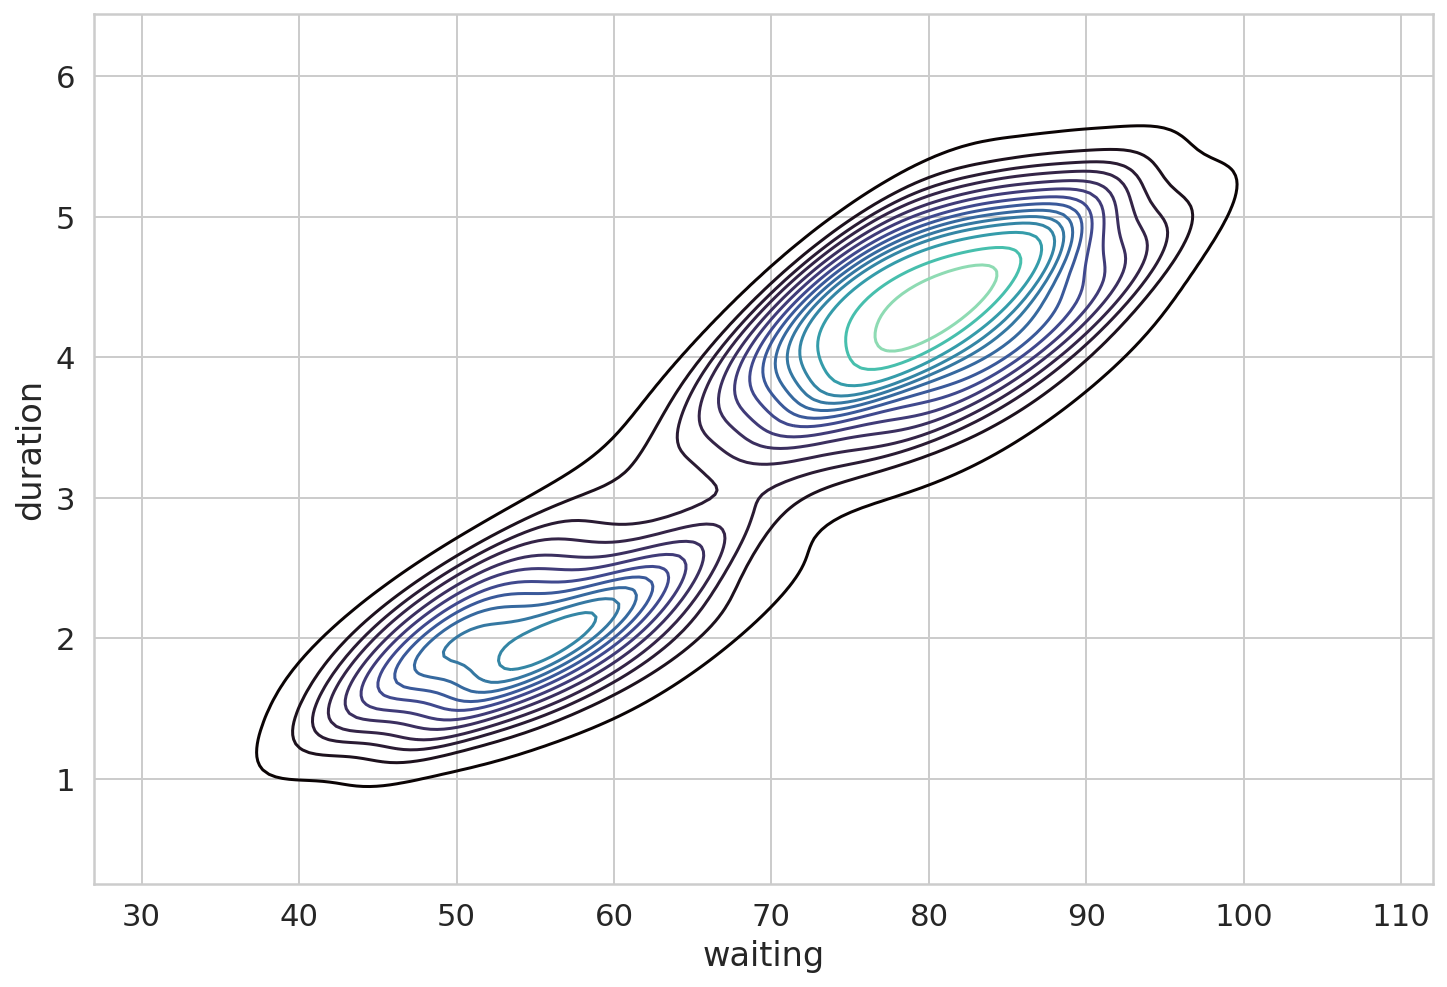

In [ ]:
plt.figure(figsize=(12, 8))
sns.kdeplot(
    data=geyser[["waiting", "duration"]], x="waiting", y="duration" #Забыли добавить x, y
    ,cmap='mako', levels=15
)
plt.xlabel("waiting")
plt.ylabel("duration")
plt.show()

# Сглаживание

На практике данные, которые мы исследуем, как правило зашумлены. Давайте посмотрим на пример.

In [ ]:
x = np.linspace(1, 400, 600)

sample_1 = 1 / x**(0.2) + np.random.randn(*x.shape)
sample_2 = 3 / x**(0.2) + np.random.randn(*x.shape)

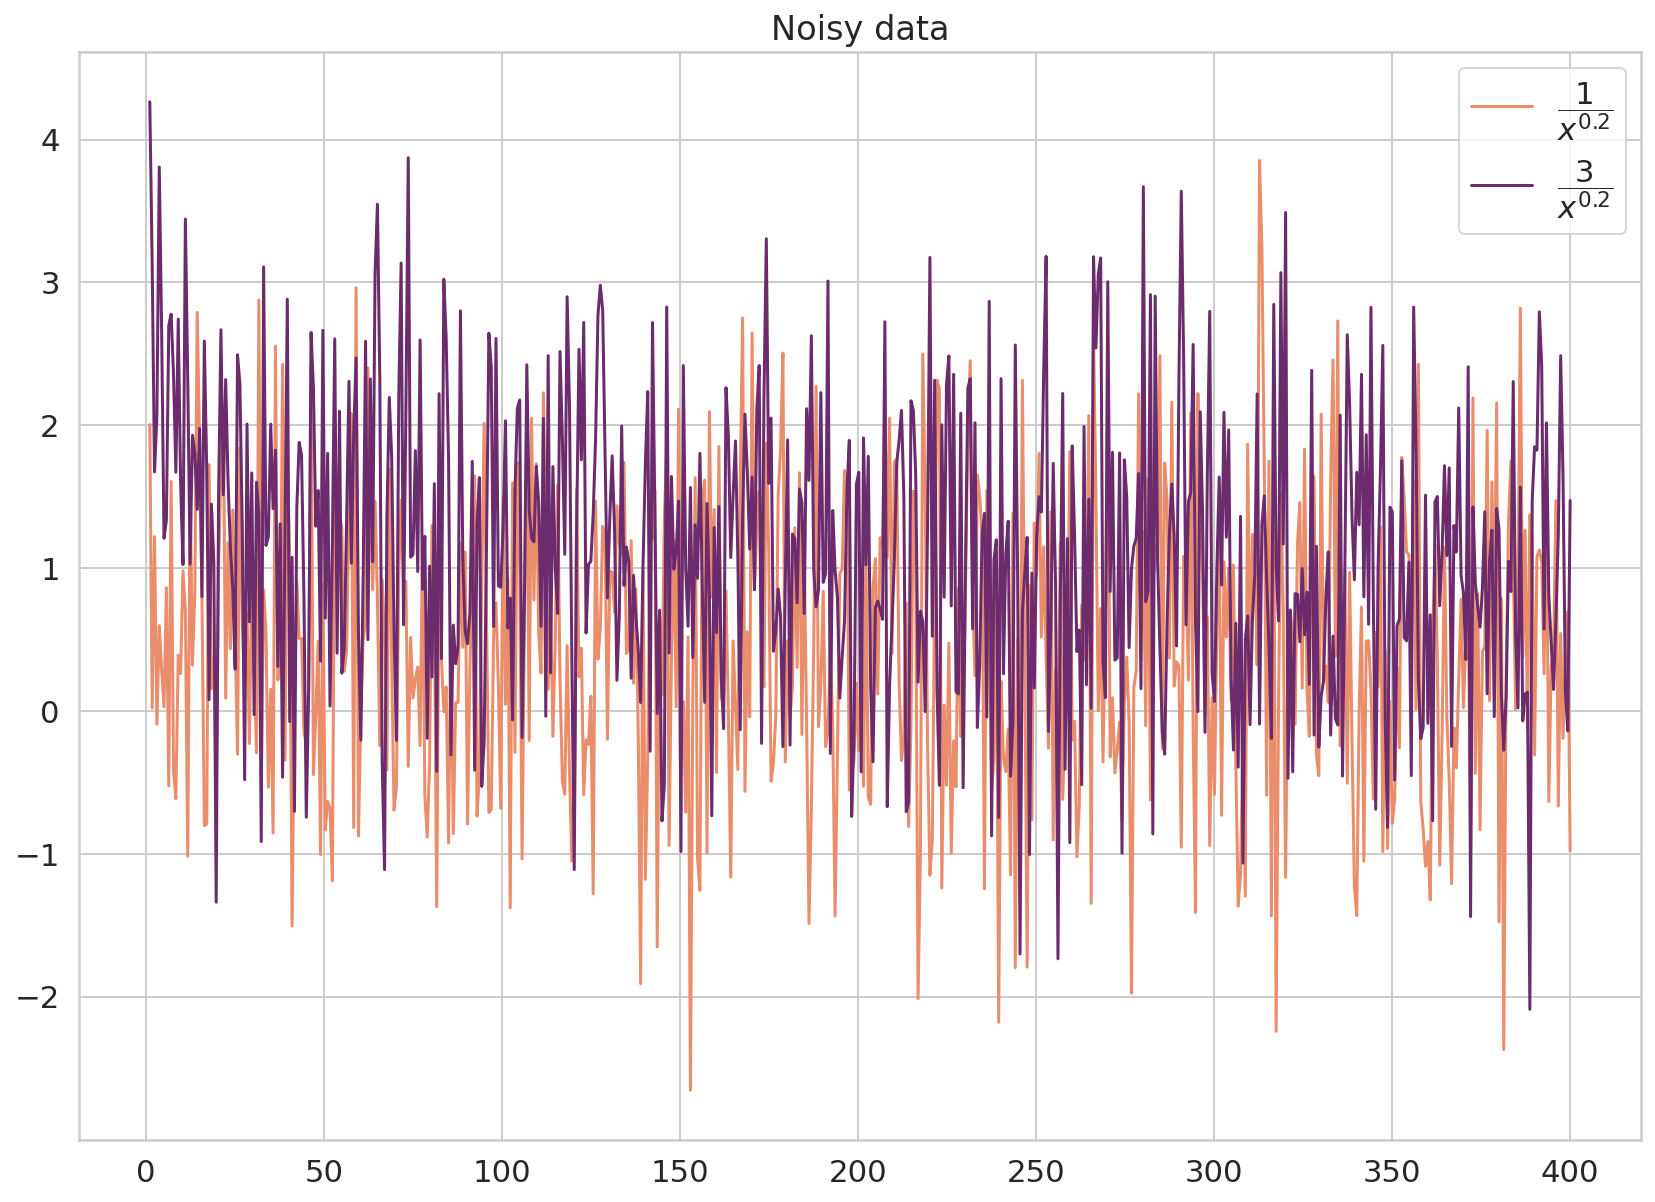

In [ ]:
sns.set(style="whitegrid", font_scale=1.4)

plt.figure(figsize=(14, 10))
plt.title("Noisy data")
plt.plot(
    x, 
    sample_1, 
    label=r"$\dfrac{1}{x^{0.2}}$", 
    color=sns.color_palette("flare")[0]
)
plt.plot(
    x, 
    sample_2, 
    label=r"$\dfrac{3}{x^{0.2}}$",
    color=sns.color_palette("flare")[-1]
)
plt.legend()
plt.show()

Такой график тяжело интерпретировать. Не ясно какая зависимость $y(x)$ присутствует, присутствует ли она вовсе или мы имеем дело с белым шумом. Что же делать?

Для таких случаев было придумано множество методов, например, exponential moving average. Такой метод восстанавливает сглаженный элемент $s_t$ основываясь на предыдущих, причем чем ближе элемент $x_{t-k}$ из исходных данных был к $s_t$ (чем менье было $k$), тем больший вес имеет этот элемент при восстановлении $s_t$. То есть:

$$
s_t = \alpha x_t + (1 - \alpha)s_{t-1}
$$

Как видно у такого метода есть параметр $\alpha$, который обысно подбирается "на глаз".

In [ ]:
from typing import Union, List

def ema(
    scalars: Union[List[float], np.ndarray], weight: float
) -> List[float]:  # Weight between 0 and 1
    """
    Applies ema smoothing.

    Args:
        scalars: original data
        weight: smooth parameter
    
    Returns:
        smoothed data
    """
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

Посмотрим на результаты.

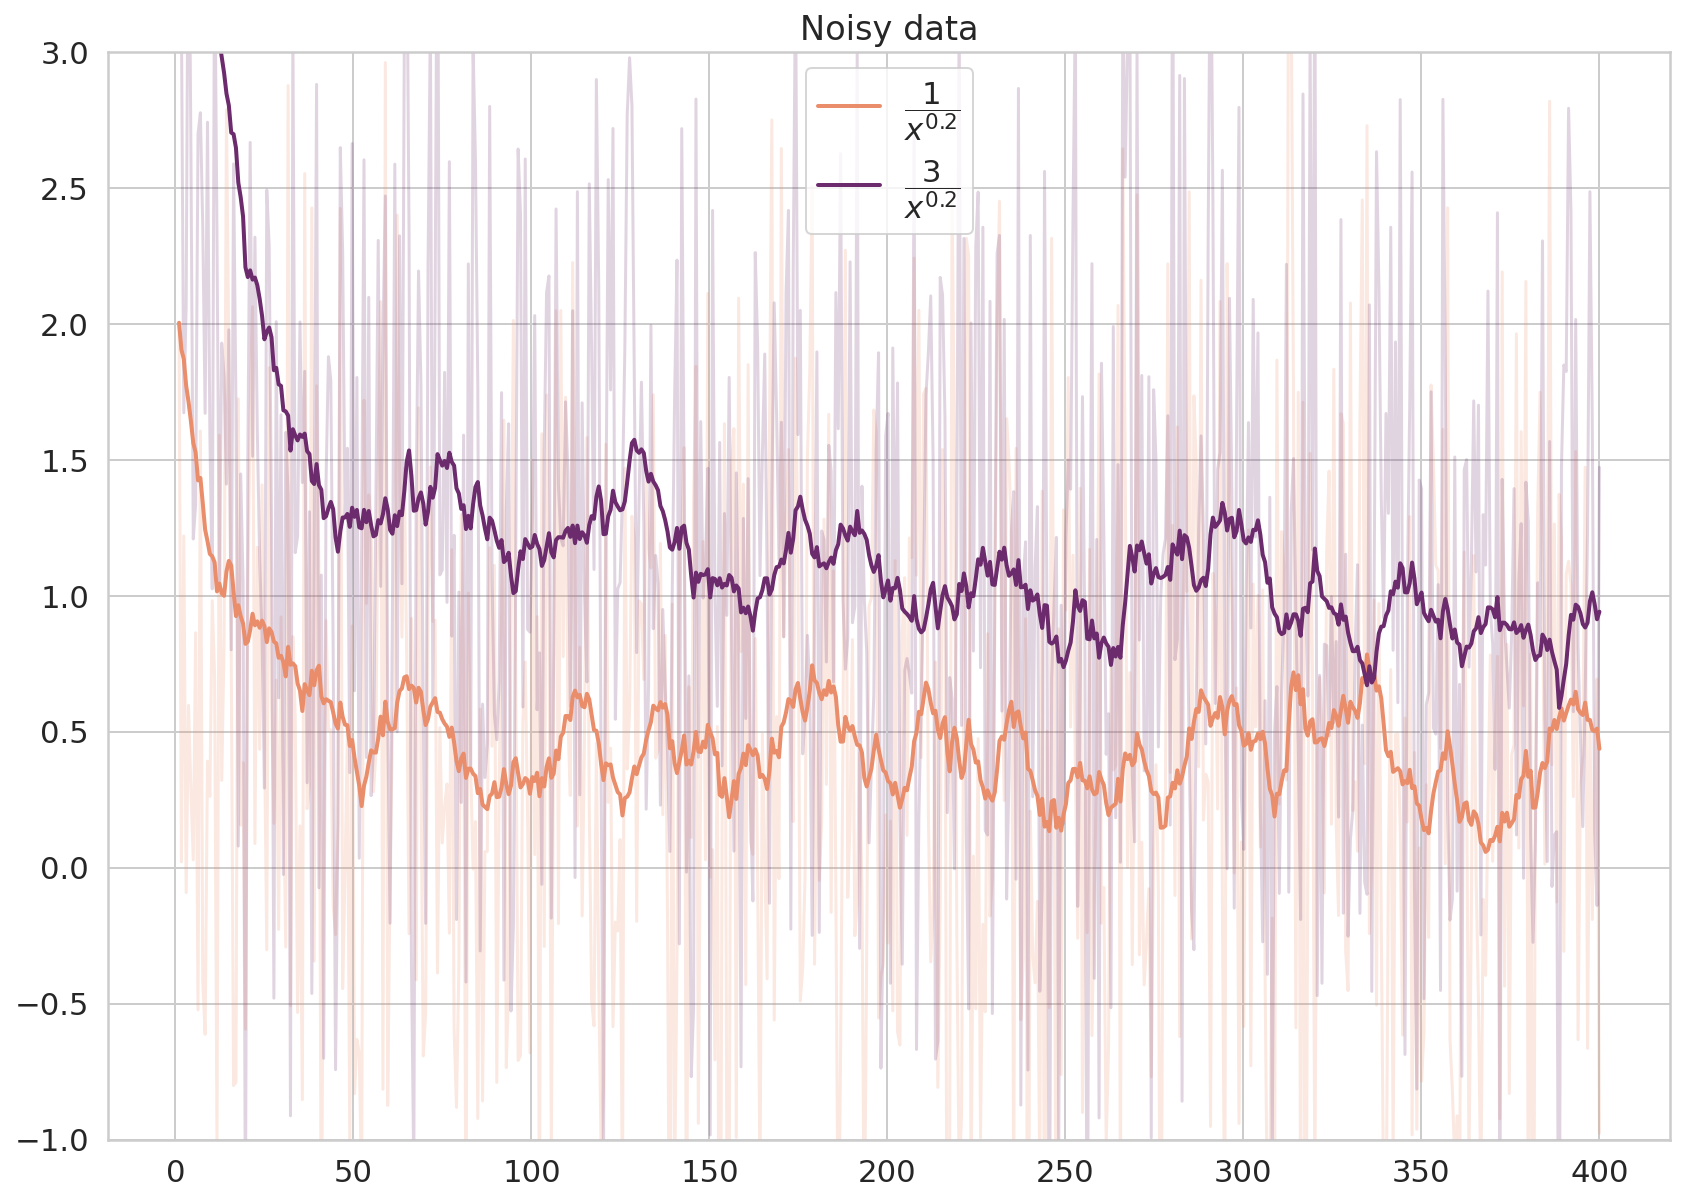

In [ ]:
smoothed_sample_1 = ema(sample_1, 0.95)
smoothed_sample_2 = ema(sample_2, 0.95)

plt.figure(figsize=(14, 10))
plt.title("Noisy data")
plt.plot(
    x, 
    sample_1, 
    alpha=0.2, 
    color=sns.color_palette("flare")[0]
)
plt.plot(
    x, 
    sample_2, 
    alpha=0.2, 
    color=sns.color_palette("flare")[-1]
)
plt.plot(
    x, 
    smoothed_sample_1, 
    label=r"$\dfrac{1}{x^{0.2}}$",
    color=sns.color_palette("flare")[0],
    linewidth=2,
)
plt.plot(
    x, 
    smoothed_sample_2, 
    label=r"$\dfrac{3}{x^{0.2}}$",
    color=sns.color_palette("flare")[-1],
    linewidth=2,
)
plt.legend()
plt.ylim(-1, 3)
plt.show()

Теперь мы видим, что оранжевые данные лежат ниже фиолетовых, и в целом виден тренд приближения к нулю.

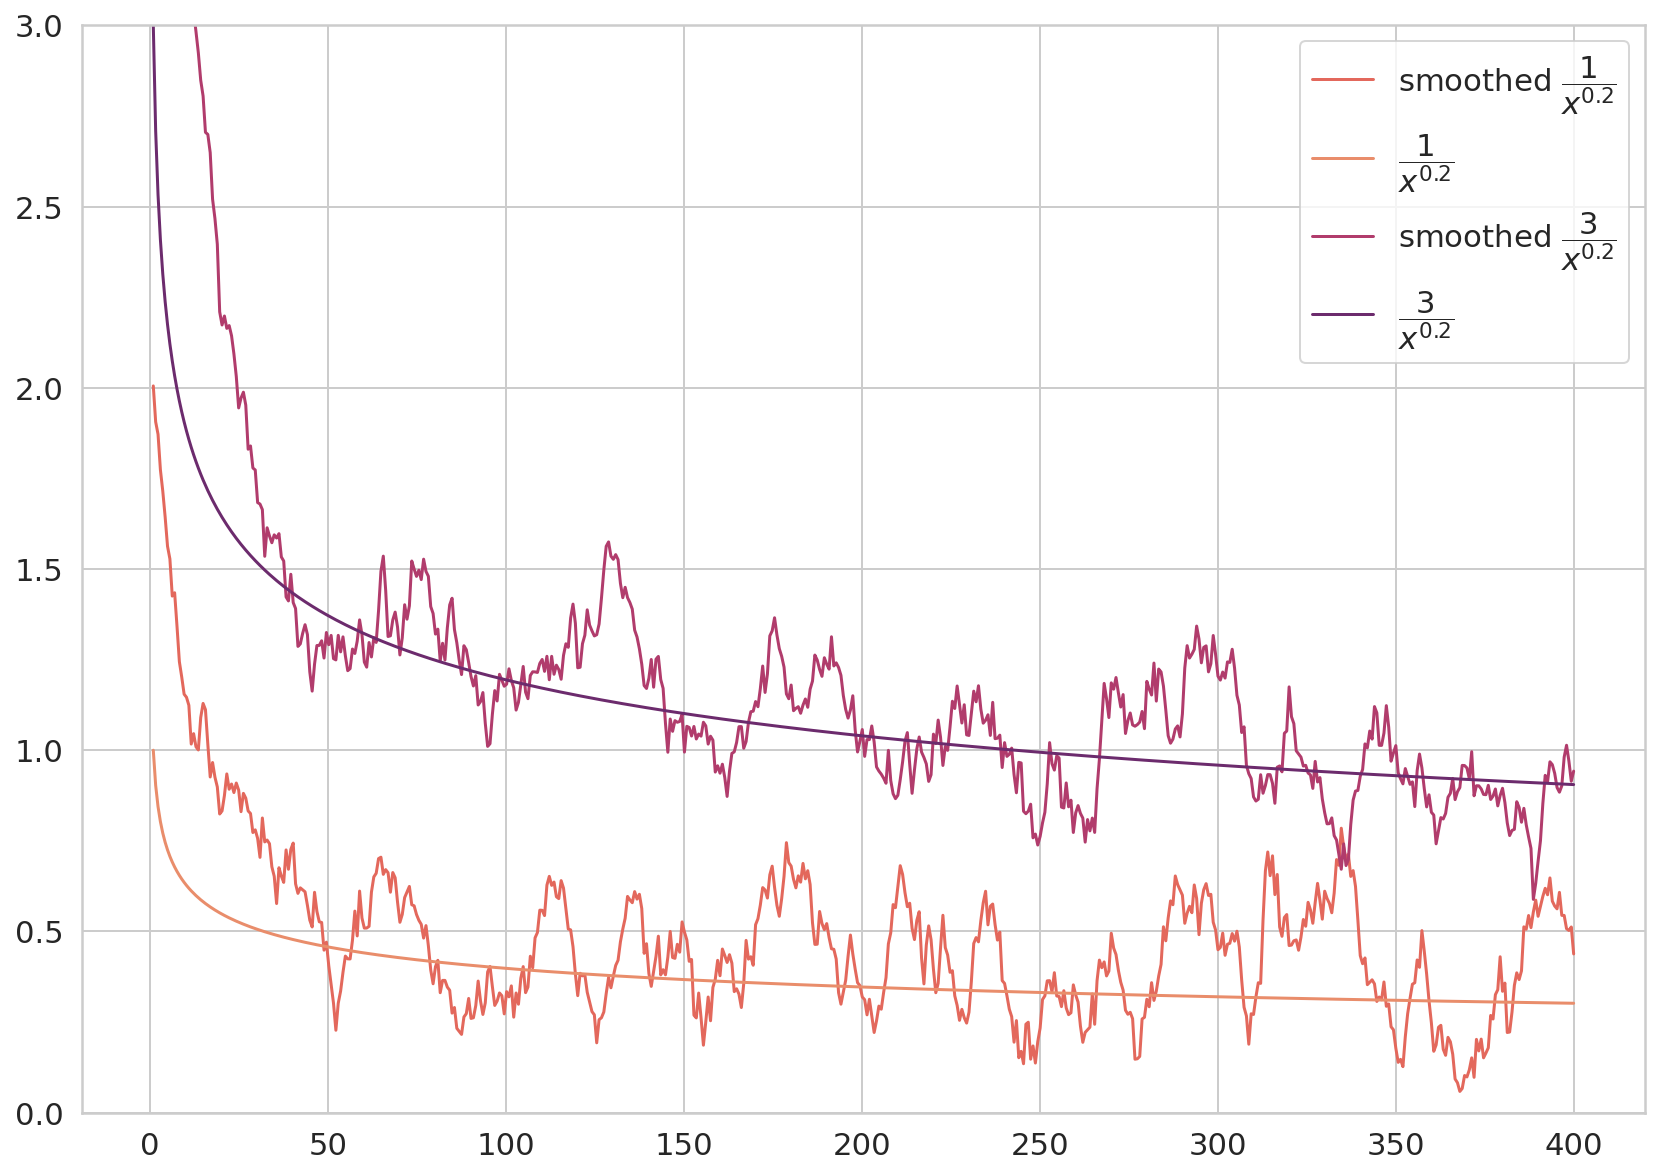

In [ ]:
plt.figure(figsize=(14, 10))
plt.plot(
    x, 
    smoothed_sample_1, 
    label=r"smoothed $\dfrac{1}{x^{0.2}}$", 
    color=sns.color_palette("flare")[1]
)
plt.plot(
    x, 
    1/x**0.2, 
    label=r"$\dfrac{1}{x^{0.2}}$", 
    color=sns.color_palette("flare")[0]
)
plt.plot(
    x, 
    smoothed_sample_2, 
    label=r"smoothed $\dfrac{3}{x^{0.2}}$", 
    color=sns.color_palette("flare")[-3]
)
plt.plot(
    x, 
    3/x**0.2, 
    label=r"$\dfrac{3}{x^{0.2}}$", 
    color=sns.color_palette("flare")[-1]
)
plt.legend()
plt.ylim(0, 3)
plt.show()

Наложив оригинальную зависимость можно заметить, что сглаживание неплохо ее приближает.

Желаем удачи!

Команда курса.

